# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [0]:
import pandas as pd 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Print the data
- First 5 rows only

In [0]:
df = pd.read_csv("/content/drive/My Drive/daily-minimum-temperatures-in-me.csv")

In [18]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [19]:
df.shape

(3650, 2)

### Set index column
- Set the DataFrame index using "Date" column

In [0]:
df.index = df.Date

In [0]:
df = df.drop(['Date'],axis =1)

In [22]:
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 2

### Check the total count of null values in the data

In [23]:
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [0]:
df = df.dropna()

In [25]:
df.shape

(3650, 1)

## Question 3

### Describe your dataframe
- use describe() method

In [26]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

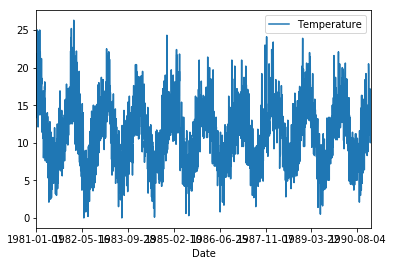

In [27]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2734fa40f0>]],
      dtype=object)

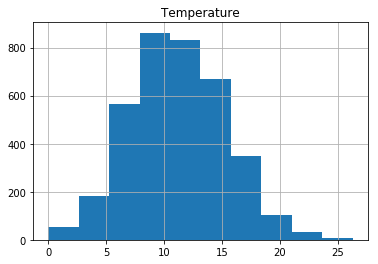

In [28]:
df.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [29]:
df.Temperature.min()

0.0

In [30]:
df.Temperature.max()

26.3

## Question 4

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
rows = df.shape[0]
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

In [49]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [50]:
print(scaled[:10])

[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 [0.55513308]
 [0.60076046]
 [0.60076046]
 [0.60076046]
 [0.66159696]
 [0.82889734]
 [0.76045627]]


### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [52]:
#Create the model
train_size = int(len(scaled) * 0.75)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))


train: 2737
test: 913


### Print scaled train and test data
- print only first 5 values

In [54]:
train[:10]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046],
       [0.60076046],
       [0.66159696],
       [0.82889734],
       [0.76045627]])

In [55]:
test[:10]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163],
       [0.46768061],
       [0.49429658],
       [0.43346008],
       [0.25855513],
       [0.28897338]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
look_back = 1
X_train, y_train = create_seq_data(train, look_back)
X_test, y_test = create_seq_data(test, look_back)

In [59]:
print(X_train, y_train)

[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.38022814]
 [0.25475285]
 [0.35741445]] [0.68060837 0.7148289  0.55513308 ... 0.25475285 0.35741445 0.35361217]


In [64]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


(2736, 1, 1)
(912, 1, 1)


### Print shape of data
- print shape of X_train and X_test

In [65]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [0]:
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

### summarize your model
- use summary() method

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [73]:
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 5s - loss: 0.0239
Epoch 2/50
 - 4s - loss: 0.0122
Epoch 3/50
 - 4s - loss: 0.0106
Epoch 4/50
 - 4s - loss: 0.0102
Epoch 5/50
 - 4s - loss: 0.0102
Epoch 6/50
 - 4s - loss: 0.0102
Epoch 7/50
 - 4s - loss: 0.0100
Epoch 8/50
 - 4s - loss: 0.0101
Epoch 9/50
 - 4s - loss: 0.0101
Epoch 10/50
 - 4s - loss: 0.0100
Epoch 11/50
 - 4s - loss: 0.0100
Epoch 12/50
 - 4s - loss: 0.0100
Epoch 13/50
 - 4s - loss: 0.0100
Epoch 14/50
 - 4s - loss: 0.0101
Epoch 15/50
 - 4s - loss: 0.0100
Epoch 16/50
 - 4s - loss: 0.0100
Epoch 17/50
 - 4s - loss: 0.0101
Epoch 18/50
 - 4s - loss: 0.0100
Epoch 19/50
 - 4s - loss: 0.0100
Epoch 20/50
 - 4s - loss: 0.0100
Epoch 21/50
 - 4s - loss: 0.0101
Epoch 22/50
 - 4s - loss: 0.0100
Epoch 23/50
 - 4s - loss: 0.0100
Epoch 24/50
 - 4s - loss: 0.0101
Epoch 25/50
 - 4s - loss: 0.0100
Epoch 26/50
 - 4s - loss: 0.0100
Epoch 27/50
 - 4s - loss: 0.0100
Epoch 28/50
 - 4s - loss: 0.0100
Epoch 29/50
 - 4s - loss: 0.0099
Epoch 30/50
 - 4s - loss: 0.0099
Epoch 31/50
 - 4s -

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test, batch_size=batch_size)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [79]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 2.61 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [80]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.54 RMSE
